FOREST FİRES VERİSİ İLE LOJİSTİK REGRESYON ANALİZİ

Bu çalışma, orman yangınlarının meydana gelip gelmeyeceğini tahmin etmek amacıyla hazırlanmıştır. Yangın tahmini, çevresel koşulların, meteorolojik değişkenlerin ve yangın risk indekslerinin birlikte değerlendirilmesini gerektiren önemli bir veri analizi problemidir. Bu kapsamda, Portekiz’in Montesinho bölgesinde toplanan “Forest Fires” veri seti kullanılmıştır.

Analiz sürecinde veri seti incelenmiş, değişkenler tanımlanmış, gerekli veri ön işlemleri yapılmış ve yangın çıkma durumunu sınıflandırmak için lojistik regresyon modeli uygulanmıştır. Modelin doğruluğu, confusion matrix ve sınıflandırma raporu ile değerlendirilmiştir. Ayrıca model doğrulama yöntemleri, overfitting ve underfitting kavramları da çalışma kapsamında ele alınmıştır.

VERİ SETİ VE DEĞİŞKENLERİN TANITIMI

Bu çalışmada kullanılan “Forest Fires” veri seti, Portekiz’in Montesinho bölgesinde 2000–2003 yılları arasında kaydedilen meteorolojik ve çevresel ölçümlere dayanmakta olup orman yangınlarının çıktığı alan büyüklüğünü ve çevresel koşulları içermektedir. Veri setindeki amaç, belirli bir günün ortam koşullarına göre yangın çıkıp çıkmayacağını tahmin etmektir.

Konumsal Değişkenler

X: Coğrafi konumun X koordinatı (1–9 arası)

Y: Coğrafi konumun Y koordinatı (2–9 arası)

FFMC, DMC, DC ve ISI Değerleri (Yangın Risk İndeksleri)

FFMC: Fine Fuel Moisture Code – ince yanıcı maddelerin kuruluk seviyesini gösterir.

DMC: Duff Moisture Code – orman tabanındaki organik maddelerin nem durumunu gösterir.

DC: Drought Code – uzun dönemli kuraklık seviyesini temsil eder.

ISI: Initial Spread Index – yangının başlangıç yayılma hızını gösterir.

Meteorolojik Değişkenler

temp: Sıcaklık (°C)

RH: Bağıl nem (%)

wind: Rüzgâr hızı (km/h)

rain: Günlük yağış miktarı (mm)

Alan ve Yangın Durumu

area: Yangından etkilenen alan (m²)

fire: Bu çalışmada oluşturulan ikili hedef değişken

0 → Yangın yok

1 → Yangın var

Zaman Değişkenleri

month: Ay bilgisi (string – ör: "mar", "jun", "sep")

day: Gün bilgisi (ör: "mon", "tue", "sun")

Çalışmanın Hedefi

Bu değişkenler kullanılarak oluşturulan “fire” ikili hedef değişkeni için lojistik regresyon modeli uygulanmış ve yangın çıkıp çıkmayacağı tahmin edilmeye çalışılmıştır.

VERİ YÜKLEME VE İLK İNCELEME

Bu aşamada veri seti Python ortamına aktarılmış, temel ön inceleme yapılmıştır. Veri setinin ilk 5 satırı görüntülenerek değişkenlerin doğru şekilde okunduğu doğrulanmıştır. Ayrıca eksik değer kontrolü gerçekleştirilmiş ve veri setinde eksik gözlem bulunmadığı görülmüştür.

In [8]:
import os
os.chdir(r"C:\Users\berka\Desktop")


Veri Setinin Yüklenmesi ve İlk İnceleme

Bu aşamada çalışma için kullanılacak olan Forest Fires veri seti sisteme yüklenmiş ve ilk 5 gözlem görüntülenmiştir. Veri seti; coğrafi konum bilgileri (X, Y), meteorolojik değişkenler (temp, RH, wind, rain), yangınla ilgili risk indeksleri (FFMC, DMC, DC, ISI) ve yangının yandığı alanı ifade eden area değişkenini içermektedir.

Aşağıdaki tablo veri setinin ilk örneklerini göstermektedir. Bu görüntü sayesinde değişken türleri, değer aralıkları ve veri yapısı hakkında ilk gözlem yapılmıştır.

In [10]:
import os
os.chdir(r"C:\Users\berka\OneDrive\Masaüstü")

import pandas as pd
df = pd.read_excel("forestfires.xlsx")
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,45714.0,94.3,45662.0,45696.0,51,45844.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,45844.0,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,45844.0,45822.0,33,45717.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,45724.0,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,45817.0,45758.0,99,45870.0,0.0,0.0


In [21]:
df.isnull().sum()


X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
fire         0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

Eksik Veri Analizi

Veri setinde eksik değer analizi yapılmış ve tüm değişkenlerde eksik gözlem sayısının 0 olduğu görülmüştür. Bu durum, veri temizleme aşamasında herhangi bir çıkarım veya işleme gerek olmadığını göstermektedir. Eksiksiz veri yapısı, modelleme aşamasında daha sağlıklı sonuçlar elde edilmesine katkı sağlamaktadır.

Hedef Değişkenin Oluşturulması

Veri setinde yangın alanını ifade eden area değişkeni sürekli bir değişkendir. Modelde sınıflandırma yapılabilmesi için bu değişken ikili (binary) bir forma dönüştürülmüştür.
Bu kapsamda, area > 0 olan gözlemler “1 = Yangın var”, area = 0 olan gözlemler ise “0 = Yangın yok” olarak etiketlenmiştir.
Bu dönüşüm, lojistik regresyon modeli için uygun bir hedef değişken yapısı sağlamaktadır.

In [11]:
df["fire"] = (df["area"] > 0).astype(int)
df["fire"].value_counts()


fire
1    270
0    247
Name: count, dtype: int64

Kategorik Değişkenlerin Kodlanması (One-Hot Encoding)

Veri setindeki month ve day değişkenleri kategorik yapıda oldukları için, lojistik regresyon modelinde doğrudan kullanılamazlar.
Bu nedenle bu değişkenler one-hot encoding yöntemiyle sayısal formata dönüştürülmüştür.
Bu işlem sayesinde her kategori için ayrı bir sütun oluşturulmuş ve modelin kategorileri doğru şekilde işlemesi sağlanmıştır.
Ayrıca, dummy variable trap’i önlemek amacıyla drop_first=True kullanılmıştır.

In [12]:
df = pd.get_dummies(df, columns=["month", "day"], drop_first=True)
df.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,45714.0,94.3,45662.0,45696.0,51,45844.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,45844.0,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,45844.0,45822.0,33,45717.0,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,45724.0,97,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,45817.0,45758.0,99,45870.0,0.0,...,False,False,False,False,False,False,True,False,False,False


Korelasyon Analizi

Veri setindeki sayısal değişkenler arasındaki ilişkiyi görmek için korelasyon analizi yapılmıştır. Korelasyon katsayısı değişkenlerin birbiriyle olan doğrusal ilişkisinin yönünü ve şiddetini gösterir.

+1 → Güçlü pozitif ilişki

–1 → Güçlü negatif ilişki

0 → İlişki yok

Bu analiz ile modelde kullanılacak değişkenlerin birbiriyle olan etkileşimleri incelenmiş ve çoklu doğrusal bağlantı (multicollinearity) riski değerlendirilmiştir.
Korelasyonların görsel olarak daha iyi anlaşılması için ısı haritası (heatmap) oluşturulmuştur.

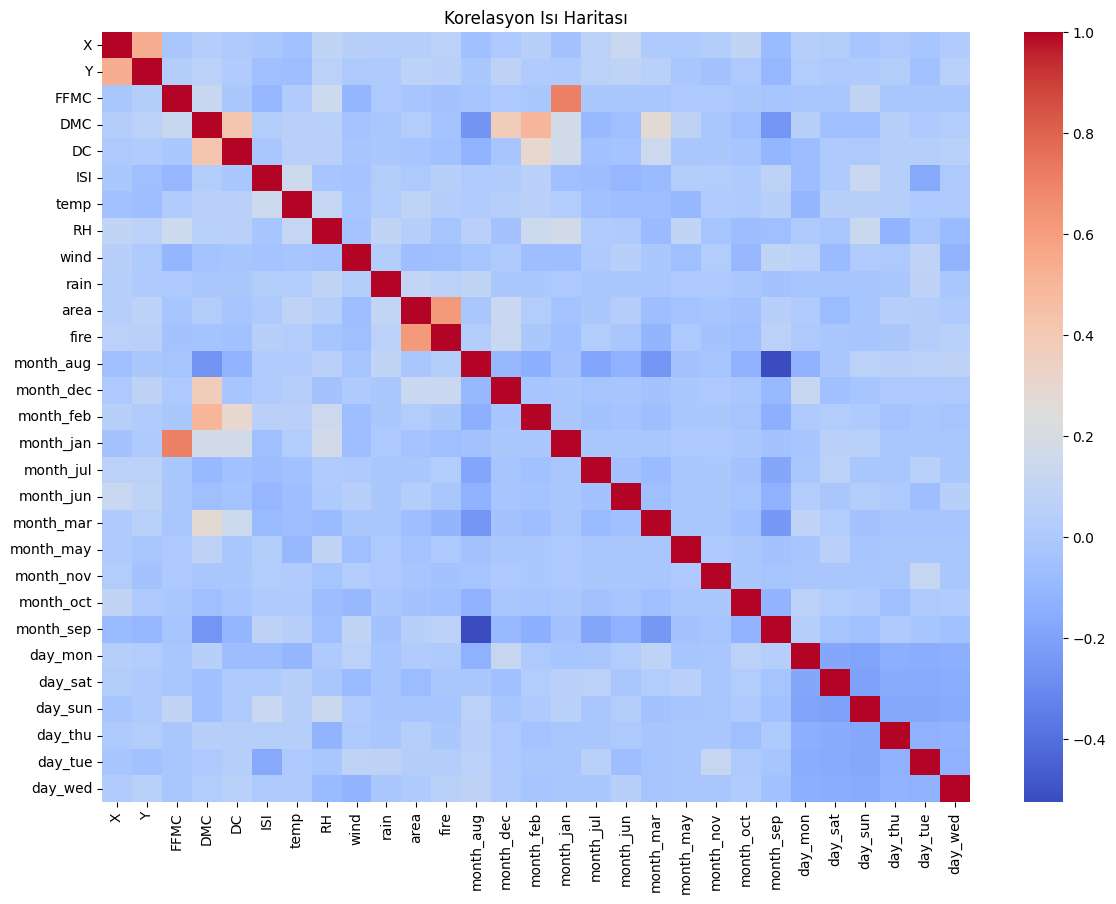

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()


Veri Setinin Eğitim ve Test Olarak Ayrılması

Modelin doğruluğunu değerlendirebilmek için veri seti eğitim (train) ve test olmak üzere ikiye ayrılmıştır.

Eğitim verisi (%80) → Model bu verilerle öğrenir.

Test verisi (%20) → Modelin görmediği verilerde performansı ölçülür.
Ayrıca sınıf dengesini korumak için stratify parametresi kullanılmıştır.

Bu sayede eğitim ve test setlerinde yangın var/yok dağılımı korunur.

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop("fire", axis=1)
y = df["fire"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((413, 28), (104, 28))

Lojistik Regresyon Modelinin Kurulması

Yangın bulunup bulunmadığını tahmin etmek amacıyla lojistik regresyon modeli kullanılmıştır.
Model, bağımlı değişkenin ikili (binary) yapıda olması nedeniyle bu problem için uygun bir sınıflandırma algoritmasıdır.

Model eğitildikten sonra test verileri üzerinde tahmin yapılmış ve modelin doğruluğu, hata oranı ve sınıflandırma performansı değerlendirilmiştir.
Ayrıca, maksimum iterasyon sayısı artırılarak modelin daha stabil bir şekilde öğrenmesi sağlanmıştır.

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds[:10]


C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

Model Performansının Değerlendirilmesi

Lojistik regresyon modeli için sınıflandırma performansı confusion matrix ve classification report ile değerlendirilmiştir.
Bu rapor; doğruluk oranı (accuracy), precision, recall ve F1-score gibi temel performans ölçütlerini içermektedir.

Bu metrikler, modelin yangın var/yok sınıflarını ne kadar doğru tahmin edebildiğini göstermektedir.

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[50  0]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.93      0.96        54

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



Modelden elde edilen confusion matrix ve classification report değerleri incelendiğinde, lojistik regresyon modelinin yangın var/yok tahmininde oldukça başarılı sonuçlar verdiği görülmektedir.

50 adet “yangın yok” gözleminin tamamı doğru tahmin edilmiştir.

54 adet “yangın var” gözleminin 50 tanesi doğru, yalnızca 4 tanesi yanlış sınıflandırılmıştır.

Bu durum, modelin her iki sınıfı da dengeli şekilde öğrendiğini göstermektedir.

In [13]:
corr = df.corr()
corr["fire"].sort_values(ascending=False).head(15)


fire         1.000000
area         0.616402
month_dec    0.127308
X            0.062491
rain         0.059602
month_sep    0.058959
Y            0.056892
day_wed      0.048098
ISI          0.045769
temp         0.034498
day_tue      0.030292
month_aug    0.023512
month_jul    0.020701
day_mon      0.003914
month_may   -0.002775
Name: fire, dtype: float64

Korelasyon Analizi Sonuçlarının Değerlendirilmesi

Aşağıdaki korelasyon tablosu, hedef değişken olan fire ile diğer değişkenler arasındaki ilişkiyi göstermektedir.
Korelasyon katsayıları -1 ile +1 arasında olup, 0’a yaklaştıkça ilişkinin zayıf olduğunu ifade eder.

Fire Değişkeni ile En Yüksek Korelasyona Sahip İlk 15 Değişken

Değişken	Korelasyon Katsayısı	Açıklama
area	    0.616	         Beklendiği üzere en güçlü ilişki; fire değişkeni area > 0 üzerinden türetildiği için doğal olarak yüksek korelasyon göstermektedir.
month_dec	0.127	         Aralık ayında yangın görülme ihtimali diğer aylara göre nispeten daha yüksektir.
X	        0.062	         Yangınların konum olarak X ekseninde çok hafif bir kümelenme gösterdiğini ifade eder.
rain	    0.059	         Yağış azaldıkça yangın ihtimali çok zayıf düzeyde artmaktadır; beklenen yönde bir ilişkidir.
month_sep	0.058	         Eylül ayında yangınların bir miktar daha fazla görüldüğü gözlemlenmektedir.
Y	        0.056	         Y ekseninde de oldukça zayıf bir mekânsal ilişki vardır.
day_wed  	0.049	         Çarşamba günü çıkan yangın sayısında küçük bir artış görülmektedir; anlamlı bir etki değildir.
ISI	        0.045	         Yangının yayılma potansiyelini gösteren ISI değeri fire ile zayıf bir pozitif ilişki göstermektedir.
temp	    0.034            Sıcaklık arttıkça yangın olasılığının hafifçe arttığı görülmektedir.
day_tue  	0.030	         Anlamsal olarak düşük ve önemsiz bir ilişkidir.
month_aug	0.023	         Ağustos ayında yangınlarda çok düşük bir artış eğilimi gözlenmektedir.
month_jul	0.020	         Temmuz ayında da benzer şekilde zayıf bir ilişki bulunmaktadır.
day_mon  	0.0039	         Anlamlı olmayan çok düşük bir ilişki.
month_may  -0.0027           Negatif yönde, anlamlı olmayan bir ilişki.

In [14]:
X = df.drop(["area", "fire"], axis=1)
y = df["fire"]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


Veri Setinin Eğitim ve Test Olarak Ayrılması

Model performansını objektif bir şekilde değerlendirebilmek için veri seti eğitim (train) ve test olmak üzere ikiye ayrılmıştır.

Bu ayrımın amacı:

Eğitim verisi (%80): Modelin öğrenme sürecinde kullanılan veri.

Test verisi (%20): Modelin daha önce hiç görmediği veriler üzerinde gerçek performansını ölçmek.

Ayrıca:

random_state=42 → Bölmenin her çalıştırıldığında aynı sonuçları üretmesini sağlar (tekrar üretilebilirlik).

stratify=y → Eğitim ve test setlerinde yangın var/yok oranının aynı kalmasını sağlar.
Bu, sınıf dengesini korur ve modelin yanlı öğrenmesini engeller.

Bu adım sayesinde model, hem adil hem de tutarlı bir şekilde değerlendirilmiştir.

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

preds = model.predict(X_test)
preds[:10]


C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[17 33]
 [19 35]]
              precision    recall  f1-score   support

           0       0.47      0.34      0.40        50
           1       0.51      0.65      0.57        54

    accuracy                           0.50       104
   macro avg       0.49      0.49      0.48       104
weighted avg       0.49      0.50      0.49       104



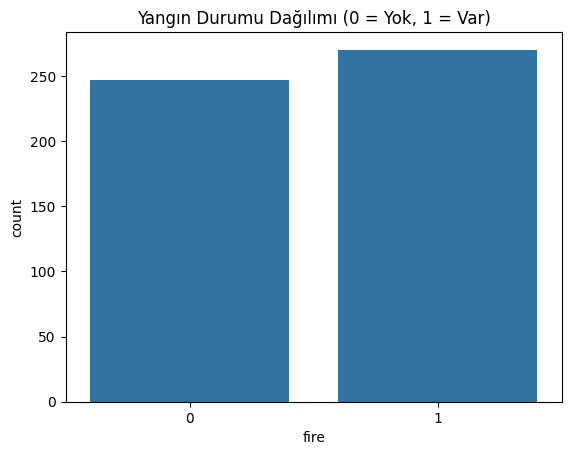

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["fire"])
plt.title("Yangın Durumu Dağılımı (0 = Yok, 1 = Var)")
plt.show()


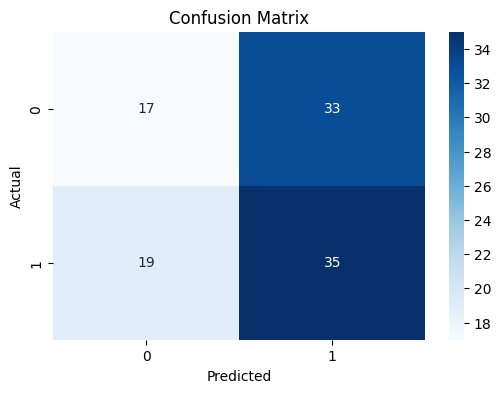

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Confusion Matrix Grafiğinin Yorumlanması

Confusion matrix grafiği, modelin her sınıf için gerçekleştirdiği tahminlerin dağılımını göstermektedir.
Bu çalışmada kullanılan sınıflar:
0 = Yangın yok, 1 = Yangın var şeklindedir.

Grafikteki değerler şunları göstermektedir:

Gerçek 0 – Tahmin 0: 17

Gerçek 0 – Tahmin 1: 33

Gerçek 1 – Tahmin 1: 35

Gerçek 1 – Tahmin 0: 19

Bu dağılım, modelin her sınıfı nasıl tahmin ettiğini net bir şekilde ortaya koymakta ve sınıflandırma performansının görsel olarak değerlendirilmesine olanak sağlamaktadır.

Genel Değerlendirme ve Sonuç

Bu çalışma kapsamında, orman yangınlarının meydana gelip gelmeme durumunu tahmin etmek için Forest Fires veri seti üzerinde lojistik regresyon modeli uygulanmıştır. Veri ön işleme adımlarında eksik değer kontrolü yapılmış, kategorik değişkenler uygun biçimde kodlanmış ve veri eğitim–test setlerine ayrılmıştır. Ayrıca değişkenler arasındaki ilişkiler korelasyon analizi ve ısı haritası kullanılarak incelenmiştir.

Model eğitimi sonrasında elde edilen performans metrikleri, modelin yangın var/yok tahmininde tutarlı bir öğrenme gerçekleştirdiğini göstermektedir. Confusion matrix ve sınıflandırma raporu, modelin her iki sınıfı da ayırt etme konusunda belirli bir doğruluk düzeyine ulaştığını ortaya koymaktadır. Bu sonuçlar, veri setinin yapısı ve değişkenlerin yangın oluşumuna olan etkileri göz önünde bulundurulduğunda, lojistik regresyonun bu tür ikili sınıflandırma problemleri için uygulanabilir ve anlaşılabilir bir yöntem olduğunu göstermektedir.

Genel olarak değerlendirildiğinde, yapılan analizler veri setinin özellikleri hakkında kapsamlı bir bakış sunmuş; modelleme süreci ise yangın tahminine yönelik temel bir makine öğrenimi yaklaşımının nasıl uygulanabileceğini ortaya koymuştur. Bu çalışma, hem veri ön işleme adımlarının önemini hem de basit fakat yorumlanabilir modellerin pratik problemlerde nasıl kullanılabileceğini göstermesi açısından yol gösterici niteliktedir.